In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%load_ext version_information

# Getting Started With Graphics


When constructing a visualization, we are mapping data elements (annotation, categories, numbers, time series) to visual elements (coordinates, color, size, movement). So the first step in designing a graphic is to decide on

- a data set (usually a `DataFrame` with observations in rows and variables in columns)
- a mapping (e.g. map height to x-coordinate, weight to y-coordinate, age to color)
- the type of plot(s) desired
    - e.g., bar chart or box plot
    - several types can sometimes be overlaid e.g., rug plot on density plot

After that, we can customize the visual elements in several ways

- direct setting of visual element attributes (size, thickness, color, transparency)
- adding labels (title, subtitle, x-axis label, y-axis label)a
- adding guides (legend, color bar)
- adding annotations (text labels, arrows)
- changing coordinate systems (Cartesian to polar, linear to log)
- changing color scales (color palettes and color maps)
- changing graphic extents (minimum and maximum values displayed)

For global changes to the look and feel of visual elements, we can set **styles** or **themes** that simultaneously alter many graphical aspects - background and foreground colors, color scheme, font family used etc.

Sometimes, we need to display multiple plots in a single graphic. To do so, we create a **layout** that specifies how different plots are related to each other (relative size, sharing of axes). There are two kinds of layouts

- plots are related (i.e. belong to the same data set and type, differ only in choice or subgroup of data elements presented)
- plots are unrelated

Finally, we often need to save the graphic to a file for later viewing or inclusion in a report.

## Resources

- [Matplotlib](http://matplotlib.org/)
- [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/)

## Data Set

We will load an example data set for the pulse rate after exercise in an experiment with the following variables

- diet
    - low fat
    - no fat
- duration of exercise
    - 1 min
    - 15 min
    - 30 min
- condition
    - rest
    - walking 
    - running

In [2]:
exercise = sns.load_dataset("exercise", index_col = 0)

In [3]:
exercise.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


## Mapping

Suppose we are interested in the change in pulse after running for 1, 15 or 30 minutes, and also if the type of diet makes a difference. One way to do this is to map time to the x-coordinate, pulse to the y-coordinate and diet to the color. We do this with several types of plots.

In [4]:
df = exercise[exercise.kind == 'running']
df.head()

,id,diet,pulse,time,kind
60,21,low fat,93,1 min,running
61,21,low fat,98,15 min,running
62,21,low fat,110,30 min,running
63,22,low fat,98,1 min,running
64,22,low fat,104,15 min,running


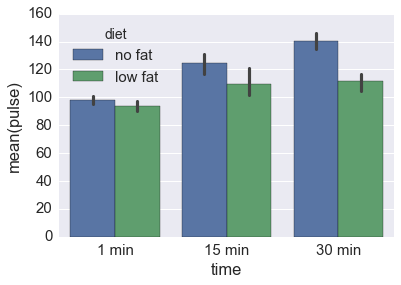

In [5]:
sns.barplot(x = 'time', y = 'pulse', hue = 'diet', data = df)
pass

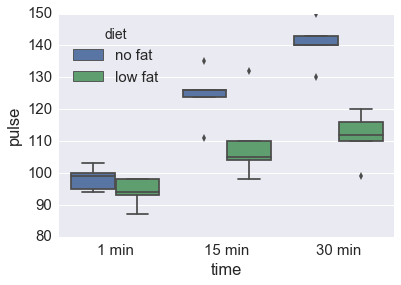

In [6]:
sns.boxplot(x = 'time', y = 'pulse', hue = 'diet', data = df)
pass

## Setting visual elements

### Change transparency

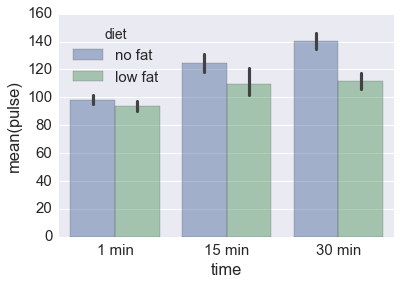

In [7]:
sns.barplot(x = 'time', y = 'pulse', hue = 'diet', data = df,
            alpha = 0.5)
pass

### Add title

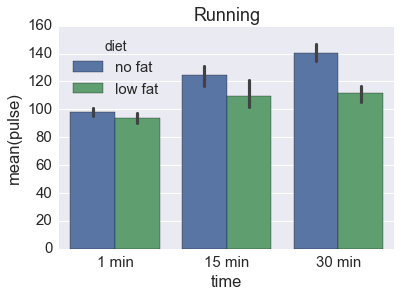

In [8]:
sns.barplot(x = 'time', y = 'pulse', hue = 'diet', data = df,)
plt.title('Running')
pass

### Change coordinate system

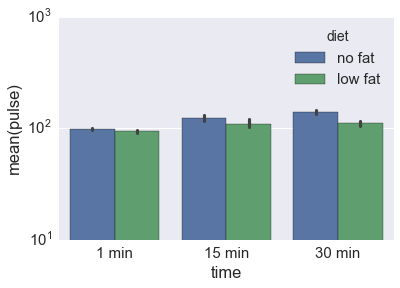

In [9]:
sns.barplot(x = 'time', y = 'pulse', hue = 'diet', data = df)
plt.gca().set(yscale = "log")
pass

### Change color palette

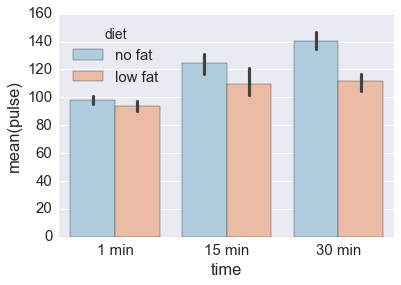

In [10]:
sns.barplot(x = 'time', y = 'pulse', hue = 'diet', data = df,
            palette = 'RdBu_r')
pass

## Multiple plots

Suppose we want to see the results for all types of exercise, not just running. We can use multiple plots to achieve this.

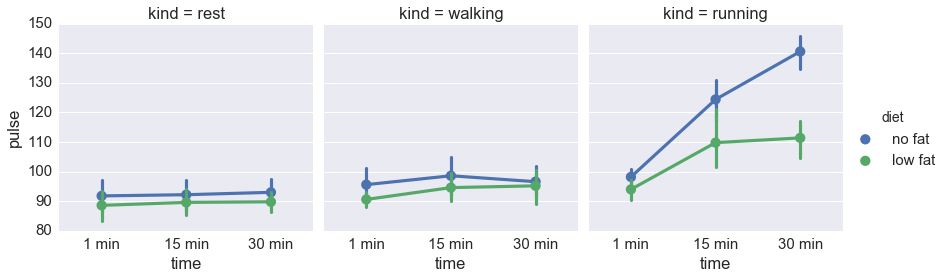

In [11]:
sns.factorplot(x = 'time', y = 'pulse', hue = 'diet', col = 'kind',
               kind = 'point', data = exercise)
pass

## Global changes with themes

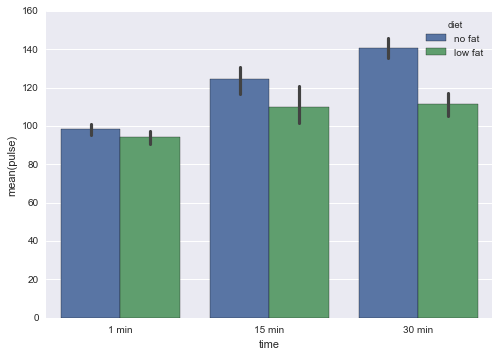

In [12]:
sns.set_context("notebook", font_scale=1.0)
sns.barplot(x = 'time', y = 'pulse', hue = 'diet', data = df)
pass

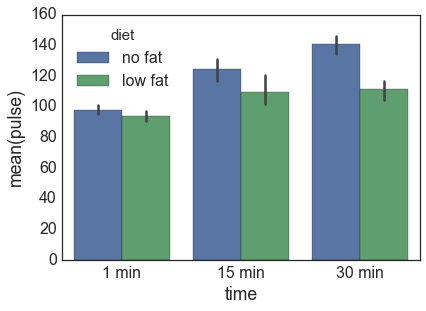

In [13]:
sns.set_context("paper", font_scale=2.0)
sns.set_style('white')
sns.barplot(x = 'time', y = 'pulse', hue = 'diet', data = df)
pass

#### Restore defaults

In [14]:
sns.set()
sns.set_context("notebook", font_scale = 1.5)

## Saving plots

### Preferred

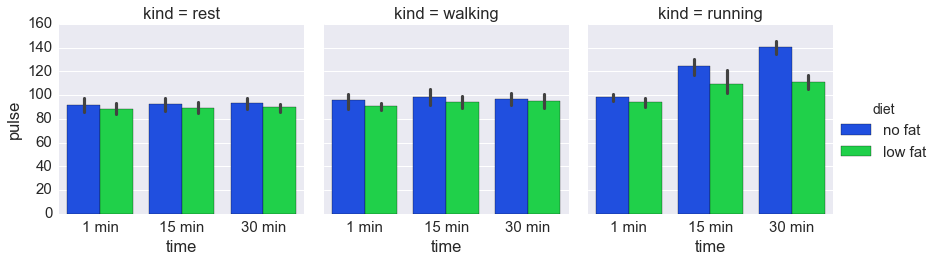

In [15]:
g = sns.factorplot(x = 'time', y = 'pulse', hue = 'diet', col = 'kind',
               kind = 'bar', palette = 'bright', data = exercise)
g.savefig('figs/exercise1.png')

### Alternative

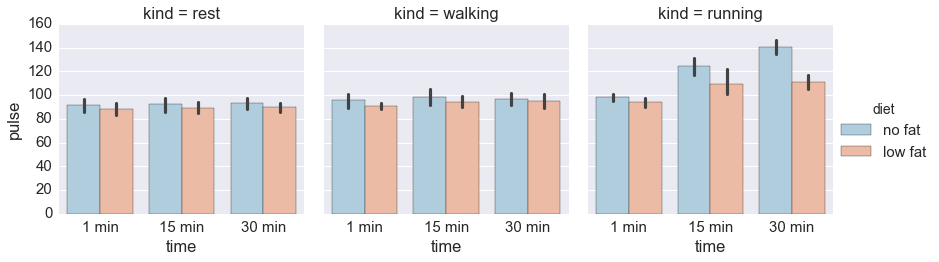

In [16]:
sns.factorplot(x = 'time', y = 'pulse', hue = 'diet', col = 'kind',
               kind = 'bar', palette = 'RdBu_r', data = exercise)
plt.savefig('figs/exercise2.png')

### Check

In [17]:
from IPython.display import Image

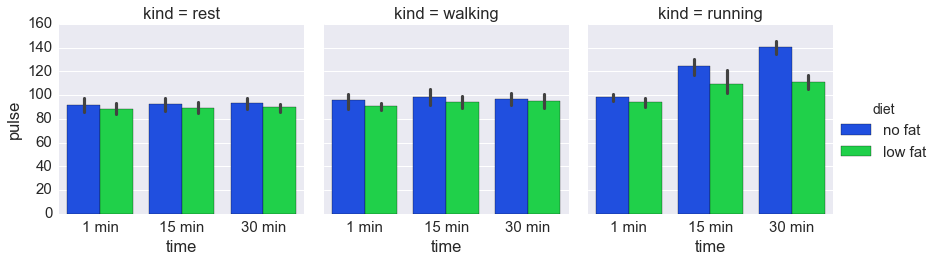

In [18]:
Image('figs/exercise1.png')

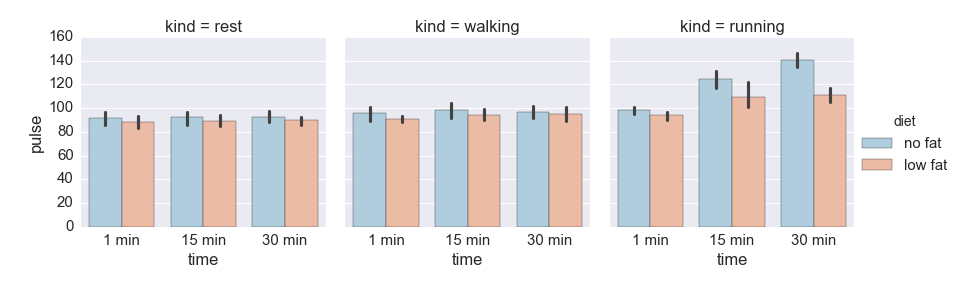

In [19]:
Image('figs/exercise2.png')

## Version Information

In [20]:
%load_ext version_information
%version_information

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.0.0
OS Darwin 15.6.0 x86_64 i386 64bit
Tue Aug 16 09:04:30 2016 EDT